In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0 , 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [6]:
x1 = np.linspace(-5.0, 5.0 , 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

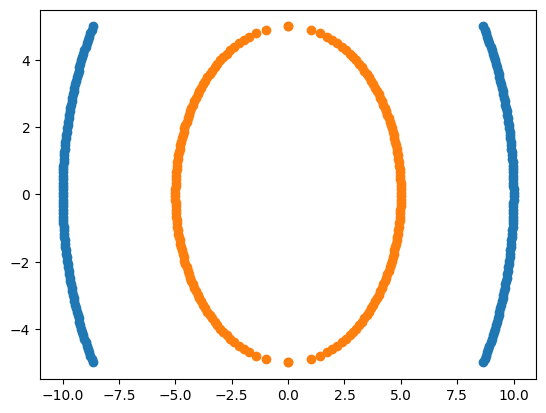

In [7]:
plt.scatter(y , x)
plt.scatter(y1 , x1)
plt.show()

In [8]:
import pandas as pd
df1 = pd.DataFrame(np.vstack([y,x]).T,columns = ['X1', 'X2'])
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T,columns = ['X1', 'X2'])
df2['Y'] = 1
df = pd.concat([df1, df2]) # Use pd.concat instead of df1.append
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [9]:
X = df.iloc[: ,:2]
y = df.Y

In [10]:
y

,Y
0,0
1,0
2,0
3,0
4,0
...,...
195,1
196,1
197,1
198,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train

,X1,X2
47,4.993619,-0.252525
110,-9.169553,3.989899
16,9.410082,-3.383838
66,9.860133,1.666667
153,-9.993749,-0.353535
...,...,...
71,9.761334,2.171717
106,-8.982945,4.393939
70,4.551063,2.070707
148,-4.997704,0.151515


In [13]:
y_train

,Y
47,1
110,0
16,0
66,0
153,0
...,...
71,0
106,0
70,1
148,1


POLYNOMIAL KERNEL


In [14]:
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1_X2'] = df['X1']*df['X2']
df.head(5)

,X1,X2,Y,X1_Square,X2_Square,X1_X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [15]:
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1_X2']]
y = df['Y']

In [16]:
import plotly.express as px
fig = px.scatter_3d(df, x='X1', y='X2', z='Y')
fig.show()

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [19]:
y_pred = classifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

In [21]:
print(classification_report(y_test , y_pred))
print(confusion_matrix(y_test , y_pred))
print(accuracy_score(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.58        52
           1       0.61      1.00      0.76        48

    accuracy                           0.69       100
   macro avg       0.80      0.70      0.67       100
weighted avg       0.81      0.69      0.66       100

[[21 31]
 [ 0 48]]
0.69


In [22]:
classifier = SVC(kernel = 'sigmoid', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
print(accuracy_score(y_test , y_pred))

0.56
